## Gauss Newton Algorithm 

The Gauss–Newton algorithm is used to solve non-linear least squares problems. It is a modification of Newton's method for finding a minimum of a function. Unlike Newton's method, the Gauss–Newton algorithm can only be used to minimize a sum of squared function values, but it has the advantage that second derivatives, which can be challenging to compute, are not required.

Non-linear least squares problems arise for instance in non-linear regression, where parameters in a model are sought such that the model is in good agreement with available observations.

We use Gauss-Newton algorithm to minimize the cost function. The cost function in our case is the difference between the known 'gravitational and earth's magnetic vectors' and the (sensors accelerometer and magnetometer) readings transformed to the Earth frame. 



We use the data from the sensors for acceleration and magnetic vectors as observation vectors. They are symbolized as 

\begin{equation}
A_{Device} = (a_{xb}, a_{yb}, a_{zb})
\end{equation}

\begin{equation}
M_{Device} = (m_{xb}, m_{yb}, m_{zb})
\end{equation}

In the Earth's frame of reference, the acceleration and magnetic vector represetation is 
\begin{equation}
A_{Earth} = (0, g, 0)
\end{equation}

Where, $g$ is Earth's gravitational acceleration equal to $9.8 m/s^2$
\begin{equation}
M_{Earth} = (m_{xE}, m_{yE}, m_{zE})
\end{equation}

By combining the vecotrs in each of the references we get 
\begin{equation}
Y_{Earth} = (0, g, 0, m_{xE}, m_{yE}, m_{zE})
\end{equation}

\begin{equation}
Y_{device} = (a_{xb}, a_{yb}, a_{zb}, m_{xb}, m_{yb}, m_{zb})
\end{equation}

The rotation matrix that shall rotate the device vector to the Earth vector, in quaternion form is : 


$$\mathbf{R_{t}} = \left[\begin{array}
{rrr}
M_{t} & 0 \\
0 & M_{t} 
\end{array}\right]
$$

Where the matrix M is described as : 
$$\mathbf{M_{t}} = \left[\begin{array}
{rrr}
q_4^2+q_1^2-q_2^2-q_3^2 & 2(q_1q_2-q_3q_4) & 2(q_1q_3 + q_2q_4) \\
2(q_1q_2 + q_3q_4) & q_4^2+q_2^2-q_1^2-q_3^2 & 2(q_2q_3-q_4q_1)\\
2(q_1q_3 - q_2q_4) & 2(q_3q_2+q_1q_4) & q_4^2+q_3^2-q_1^2-q_2^2)
\end{array}\right]
$$

The Gauss-Newton optimization method is used to minimize discrepancy between
actual and computed measurement vectors as below equation : 

\begin{equation}
\epsilon  = Y_{Earth} - R_{t}.Y_{Device}
\end{equation}

The Gauss-Newton method executes following iteration:

\begin{equation}
 q_t = q_{t-1} - (J_{t}^T.J_{t})^{-1}.J_{t}^T.\epsilon
\end{equation}


Where $J_k$ is the Jacobian of $\epsilon$ calculated in $q_k$ as is shown in below equation
\begin{equation}
 J_{t}(q_{k}(t)) = \frac{\partial \epsilon}{\partial (q_{k}(t))} = - [ (\frac{\partial R}{\partial (q_{1})} . Y_{Device(t)})(\frac{\partial R}{\partial (q_{2})} . Y_{Device(t)})((\frac{\partial R}{\partial (q_{3})} . Y_{Device(t)}))((\frac{\partial R}{\partial (q_{4})} . Y_{Device(t)}))  ]  
\end{equation}
 
and solving Jacobian.


### Creating a class for Gauss Newton Algorithm

**class GaussNewtonOptimization **

With **methods** for 
    1. normalize : norm
    2. Gaussnewton operation : Gaussnewton

We collected data with **No Rotation**, i.e 0,0,0 at X,Y,Z and that was measured on the device using **'Orientation Sensor'** readings, which is part of the application. So we collect the outcome at each iteration of the Gauss Newton algorithm, and look for convergence. 

In [156]:
import math
import numpy as np
from numpy import linalg as la

class GaussNewtonOptimization:
    """
    The Gauss–Newton algorithm is used to solve non-linear least squares problems. 
    """
    ## class variables : to be used later 
    counter = 0
    depth = 50
    
    def __call__(self):
        GaussNewtonOptimization.counter += 1
        return GaussNewtonOptimization.counter
    
    def __init__(self, Q1,Q2,Q3,Q4,Ax,Ay,Az,Mx,My,Mz):
        self.Q1 = Q1
        self.Q2 = Q2
        self.Q3 = Q3
        self.Q4 = Q4
        
        self.Ax = Ax
        self.Ay = Ay
        self.Az = Az
        
        self.Mx = Mx
        self.My = My
        self.Mz = Mz
        
        ## added changes considering equation 4.67 from page 60
        self.Q_now = list([self.Q1,self.Q2,self.Q3,self.Q4])

    
    def norm(Q):
        """
        return the norm of the Quaternion.
        """
        return sum( i*i for i in Q)

    def Gaussnewton(self):
        """
        Gauss Newton Algorithm : returns the Quaternion derived from Accelerometer and Magnetometer,
        iterated 10 times. 
        """
        Q1 = self.Q1
        Q2 = self.Q2 
        Q3 = self.Q3 
        Q4 = self.Q4 
        
        Ax = self.Ax 
        Ay = self.Ay 
        Az = self.Az 
        
        Mx = self.Mx 
        My = self.My
        Mz = self.Mz 
        
        # reference Attitude
#Ax           4.030215e-01
#Ay          -1.938762e-01
#Az           9.632899e+00
#MFx         -2.680208e+00
#MFy          2.209064e+01
#MFz         -3.946090e+01

## at 50 degrees at X
#Timestamp    1.494780e+12
#Ax           3.498182e-01
#Ay          -1.278746e-01
#Az           9.645478e+00
#MFx         -8.154090e+00
#MFy          6.280098e+00
#MFz         -3.016979e+01
#dtype: float64
    

        #EarthFrame = np.matrix([[0], [1] , [0], [0], [-0.03751], [0.92696]])
        EarthFrame = np.matrix([[0.403], [-0.19380] , [-9.63], [-2.680208], [22.09064], [-39.46090]])
        BodyFrame = np.matrix([[Ax], [Ay] , [Az], [Mx], [My], [Mz]])
        
        
        Q_now = list([Q1,Q2,Q3,Q4])
        #self.Q_now
        #normalize
        Q_now = [x / GaussNewtonOptimization.norm(Q_now) for x in Q_now]   
               
        q1 = Q_now[0] ; q2 = Q_now[1] ; q3 = Q_now[2] ; q4 = Q_now[3] 
        #from list to a column matrix
        Q_now = np.matrix(Q_now).transpose()
        #temp = Q_now
        intermediateQ = list()
        intermediateQ.append(Q_now)
        
        
        for i in range(0,GaussNewtonOptimization.depth):
            ## Compute Mt matrix

            # The rotation matrix that rotates the "body vector" to the "Earth vector", in Quaternion form, 
            # is expressed in equation XX of the article; which has Mt matrix in it. 

            ## elements of Mt matrix 
            mm11 = (q4**2+q1**2-q2**2-q3**2)  ;   mm12 = 2*(q1*q2-q3*q4)           ;  mm13 = 2*(q1*q3+q2*q4)
            mm21 = 2*(q1*q2+q3*q4)            ;   mm22 = (q4**2+q2**2-q1**2-q3**2) ;  mm23 = 2*(q2*q3-q4*q1)
            mm31 = 2*(q1*q3-q2*q4)            ;   mm32 = 2*(q3*q2+q1*q4)           ;  mm33 = (q4**2+q3**2-q1**2-q2**2)  

            Mt = np.matrix([[mm11, mm12, mm13], [mm21, mm22, mm23] , [mm31, mm32, mm33]])
            zero33 = np.matrix(np.zeros((3,3)))  

            ## Rotation Matrix (6 * 6)
            Rt = np.hstack((np.vstack((Mt,zero33)),np.vstack((zero33,Mt))))

            ## Jacobian Computation 

            j11 = 2*(q1*Ax + q2*Ay + q3*Az)
            j12 = 2*(-q2*Ax +  q1*Ay + q4*Az) 
            j13 = 2*(q3*Ax - q4*Ay + q1*Az)
            j14 = 2*(q4*Ax - q3*Ay + q2*Az)

            j21 = 2*(q2*Ax - q1*Ay - q4*Az)
            j22 = 2*(q1*Ax - q1*Ay - q4*Az)
            j23 = 2*(q4*Ax - q3*Ay + q2*Az)
            j24 = 2*(q3*Ax + q4*Ay - q1*Az)

            j31 = 2*(q3*Ax + q4*Ay - q1*Az)
            j32 = 2*(-q4*Ax + q3*Ay - q2*Az)
            j33 = 2*(q1*Ax + q2*Ay + q3*Az)
            j34 = 2*(q2*Ax + q1*Ay + q4*Az)

            j41 = 2*(q1*Mx + q2*My + q3*Mz)
            j42 = 2*(-q2*Mx + q1*My + q4*Mz)
            j43 = 2*(-q3*Mx - q4*My + q1*Mz)
            j44 = 2*(q4*Mx - q3*My + q2*Mz)

            j51 = 2*(q2*Mx - q1*My - q4*Mz)
            j52 = 2*(q1*Mx + q2*My + q3*Mz)
            j53 = 2*(q4*Mx - q3*My + q2*Mz)
            j54 = 2*(q3*Mx + q4*My - q1*Mz)

            j61 = 2*(q3*Mx + q4*My - q1*Mz)
            j62 = 2*(-q4*Mx + q3*My - q2*Mz)
            j63 = 2*(q1*Mx + q2*My + q3*Mz)
            j64 = 2*(-q2*Mx + q1*My + q4*Mz)

            Mt = np.matrix([[mm11, mm12, mm13], [mm21, mm22, mm23] , [mm31, mm32, mm33]])
            Jacobian_matrix = -np.matrix([[j11,j12,j13,j14],
                                         [j21,j22,j23,j24],
                                         [j31,j32,j33,j34],
                                         [j41,j42,j43,j44],
                                         [j51,j52,j53,j54],
                                         [j61,j62,j63,j64],                                  
                                        ])

            f = EarthFrame - (Rt * BodyFrame)
            
            
            ## Gauss Newton
            Q_next = Q_now - (la.inv(Jacobian_matrix.transpose()*Jacobian_matrix ) ) * (Jacobian_matrix.transpose() * f)
            
            #normalize (do not renormalise in Kalman filter)
            Q_next = [x / GaussNewtonOptimization.norm(np.array(Q_next).flatten()) for x in np.array(Q_next).flatten()]  
            
            
            
            # update quaternions
            q1 = Q_next[0] ; q2 = Q_next[1] ; q3 = Q_next[2] ; q4 = Q_next[3] 
            Q_now = np.matrix(Q_next).transpose()
            intermediateQ.append(Q_now)
            #End of 'for' loop
            
        q1 = Q_next[0] ; q2 = Q_next[1] ; q3 = Q_next[2] ; q4 = Q_next[3]
        return intermediateQ
        #return q1,q2,q3,q4




## Execute the Gauss Newton Algorithm

### Import the data 

We import the data from a text file, and save it as a Pandas dataframe. Add column Names to it. 

1. Accelerometer  : $A_{x},A_{y},A_{z}$ 
2. Magnetometer   : $MF_x,MF_y,MF_z$

will be the columns of interest for us.     



In [157]:
# Import Libraries 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# set the plot frame
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

# import data
#AtX50degrees
#At0degrees
dataraw = pd.read_csv("/home/omkar/thesis/Version4/rawdata/At0degrees.txt", skiprows=4)
## Data Extraction
dataraw.columns = ['Timestamp','STK3310_Proximity_sensor_x','STK3310_Proximity_sensor_y','STK3310_Proximity_sensor_z', 
             'STK3310_Light_sensor_x','STK3310_Light_sensor_y','STK3310_Light_sensor_z',
             'Display_Rotation_sensor_x','Display_Rotation_sensor_y','Display_Rotation_sensor_z',
             'Ax','Ay','Az',
             'MFx','MFy','MFz', 
             'Gx','Gy','Gz',
             'Rotation_Vector_Sensor_x','Rotation_Vector_Sensor_y','Rotation_Vector_Sensor_z',
             'Gravity_Sensor_x','Gravity_Sensor_y','Gravity_Sensor_z',
             'Linear_Acceleration_Sensor_x','Linear_Acceleration_Sensor_y','Linear_Acceleration_Sensor_z',
             'Orientation_Sensor_x','Orientation_Sensor_y','Orientation_Sensor_z']
data = dataraw[['Timestamp','Ax','Ay','Az','Gx','Gy','Gz','MFx','MFy','MFz']]
print(data[1125:1130])
(data.mean())

          Timestamp        Ax        Ay        Az        Gx        Gy  \
1125  1494275017864  0.402226 -0.210690  9.595961 -0.004261  0.002131   
1126  1494275017886  0.383072 -0.191536  9.672575 -0.004261  0.002131   
1127  1494275017909  0.402226 -0.191536  9.576807  0.002131  0.003196   
1128  1494275017930  0.383072 -0.191536  9.672575 -0.003196  0.001065   
1129  1494275017952  0.421380 -0.191536  9.615114 -0.004261 -0.001065   

            Gz   MFx    MFy    MFz  
1125  0.002131 -2.75  22.25 -39.75  
1126  0.002131 -2.25  21.75 -39.25  
1127  0.001065 -2.25  21.75 -39.25  
1128  0.001065 -1.75  21.75 -39.00  
1129  0.004261 -1.75  21.75 -39.00  


Timestamp    1.494275e+12
Ax           4.030215e-01
Ay          -1.938762e-01
Az           9.632899e+00
Gx          -1.060709e-03
Gy           3.092325e-03
Gz           1.810039e-03
MFx         -2.680208e+00
MFy          2.209064e+01
MFz         -3.946090e+01
dtype: float64

The values considered are     
$A_{x}=0.402226, \ A_{y}=-0.210690,\ A_{z}=9.595961$     
$MF_x=-2.75,\ MF_y=22.25,\ MF_z=-39.75$    

For the 0,0,0 orientation, which is the observation 1125th row. 

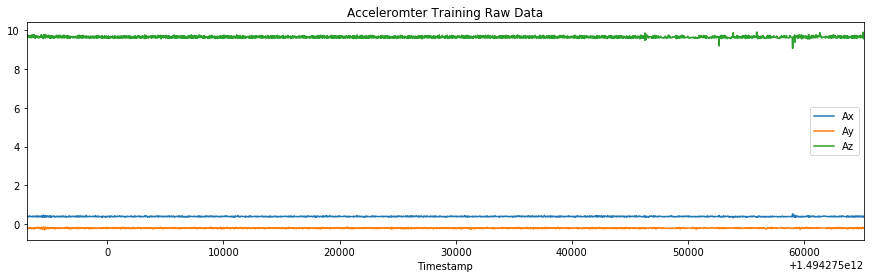

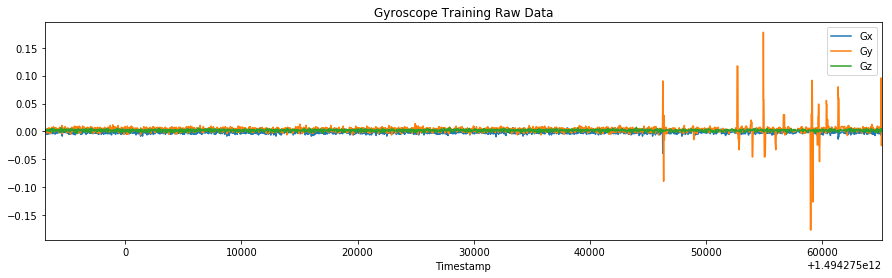

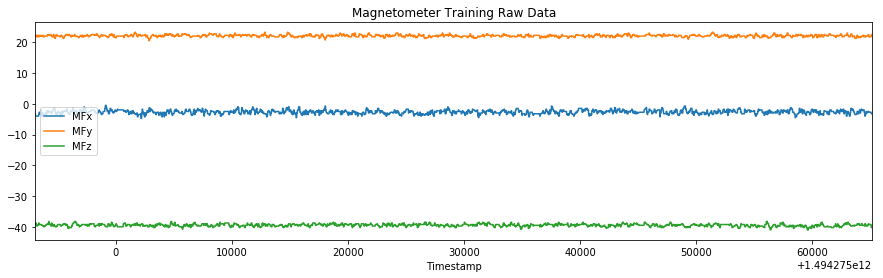

In [158]:
## Plot the Sensor Values 
data.plot(x='Timestamp',y=['Ax','Ay','Az'],title="Acceleromter Training Raw Data",figsize=(15.0, 4.0))
data.plot(x='Timestamp',y=['Gx','Gy','Gz'],title="Gyroscope Training Raw Data",figsize=(15.0, 4.0))
data.plot(x='Timestamp',y=['MFx','MFy','MFz'],title="Magnetometer Training Raw Data",figsize=(15.0, 4.0))


$\epsilon  = Y_{Earth} - R_{t}.Y_{Device}$

The Gauss-Newton method executes following iteration:

$ q_t = q_{t-1} - (J_{t}^T.J_{t})^{-1}.J_{t}^T.\epsilon$

To represent the $q_{t}\;at\;t=0$ we have $Q_{observation} = [0.5,0.5,0.5,0.5]$

In [159]:
## Initial Observation for Quaternion. 
Q_observation = np.matrix([[0.2], [-0.2] , [-0.5], [-0.15]])

RowNumber = 1125
## Call the GN Algorithm
testObj = GaussNewtonOptimization(Q1=float(Q_observation[0]),
                                                     Q2=float(Q_observation[1]),
                                                     Q3=float(Q_observation[2]),
                                                     Q4=float(Q_observation[3]),
                                                     Ax=data['Ax'][RowNumber],Ay=data['Ay'][RowNumber],Az=data['Az'][RowNumber],
                                                     Mx=data['MFx'][RowNumber],My=data['MFy'][RowNumber],Mz=data['MFz'][RowNumber])

testObj = GaussNewtonOptimization(Q1=float(Q_observation[0]),
                                                     Q2=float(Q_observation[1]),
                                                     Q3=float(Q_observation[2]),
                                                     Q4=float(Q_observation[3]),
                                                     Ax=data['Ax'][RowNumber],Ay=data['Ay'][RowNumber],Az=data['Az'][RowNumber],
                                                     Mx=data['MFx'][RowNumber],My=data['MFy'][RowNumber],Mz=data['MFz'][RowNumber])


GN_output = testObj.Gaussnewton()

In [160]:
q0 = list() ; q1 = list() ; q2 = list(); q3 = list()

for i in range(len(GN_output)):
    q0.append(float(GN_output[i][0]))
    q1.append(float(GN_output[i][1]))
    q2.append(float(GN_output[i][2]))
    q3.append(float(GN_output[i][3]))

In [161]:

GN_Q_0 = pd.DataFrame(
    {'q0': q0,
     'q1': q1,
     'q2': q2,
     'q3': q3
    })


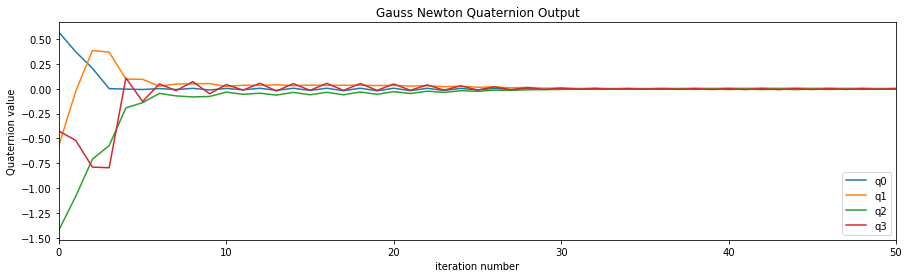

In [162]:
outgraph = GN_Q_0.plot(x=GN_Q_0.index,y=['q0','q1','q2','q3'],title="Gauss Newton Quaternion Output",
            figsize=(15.0, 4.0)
            ,legend=True)
outgraph.set_xlabel("iteration number")
outgraph.set_ylabel("Quaternion value")

In [163]:
#np.arctan2(2*((GN_Q_0["q0"]*GN_Q_0["q1"])+(GN_Q_0["q2"]*GN_Q_0["q3"])), 1-2*(GN_Q_0["q1"]*GN_Q_0["q1"]+GN_Q_0["q2"]*GN_Q_0["q2"]) )


In [164]:
GN_Q_0["phi"] = np.arctan2(2*((GN_Q_0["q0"]*GN_Q_0["q1"])+(GN_Q_0["q2"]*GN_Q_0["q3"])), 1-2*(GN_Q_0["q1"]*GN_Q_0["q1"]+GN_Q_0["q2"]*GN_Q_0["q2"]) )

GN_Q_0["theta"] = np.arcsin(2*((GN_Q_0["q0"]*GN_Q_0["q2"])-(GN_Q_0["q3"]*GN_Q_0["q1"])))

GN_Q_0["psi"] = np.arctan2(2*((GN_Q_0["q0"]*GN_Q_0["q3"])+(GN_Q_0["q1"]*GN_Q_0["q2"])), 1-2*(GN_Q_0["q2"]*GN_Q_0["q2"]+GN_Q_0["q3"]*GN_Q_0["q3"]) )



/home/omkar/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in arcsin
  app.launch_new_instance()


In [170]:
GN_Q_0.head(30)

,q0,q1,q2,q3,phi,theta,psi
0,0.567376,-0.567376,-1.418440,-0.425532,171.267952,NaN,161.595499
1,0.371515,-0.027456,-1.081676,-0.518956,140.591892,-56.327058,-170.149761
2,0.205256,0.384100,-0.707658,-0.787731,103.120926,18.338696,-145.095488
3,0.000739,0.367716,-0.570936,-0.793918,85.108255,35.663881,-155.230949
4,-0.003721,0.096710,-0.192237,0.107802,-2.660668,-1.112793,-2.409143
5,-0.007915,0.094052,-0.140281,-0.128148,2.093212,1.508527,-1.503924
6,0.001462,0.024971,-0.046875,0.048702,-0.258875,-0.147218,-0.127133
7,-0.008194,0.047188,-0.072138,-0.019492,0.118585,0.173134,-0.375968
8,0.003888,0.049280,-0.082491,0.071095,-0.662290,-0.438235,-0.444688
9,-0.012453,0.051874,-0.077722,-0.050670,0.383954,0.412109,-0.396519


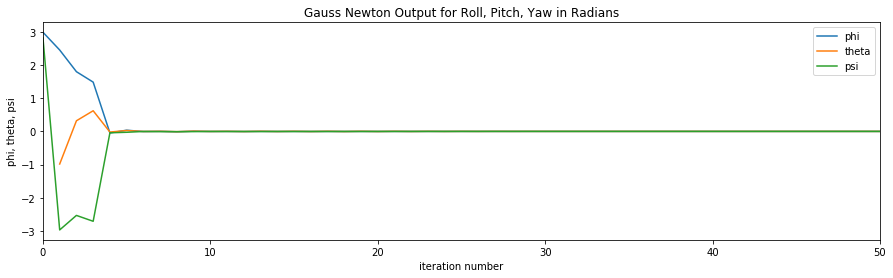

In [166]:
outgraph2 = GN_Q_0.plot(x=GN_Q_0.index,y=['phi','theta','psi'],title="Gauss Newton Output for Roll, Pitch, Yaw in Radians",
            figsize=(15.0, 4.0),legend=True)
outgraph2.set_xlabel("iteration number")
outgraph2.set_ylabel("phi, theta, psi")

In [167]:
GN_Q_0["phi"] = GN_Q_0["phi"]*57.2958
GN_Q_0["theta"] = GN_Q_0["theta"]*57.2958
GN_Q_0["psi"] = GN_Q_0["psi"]*57.2958

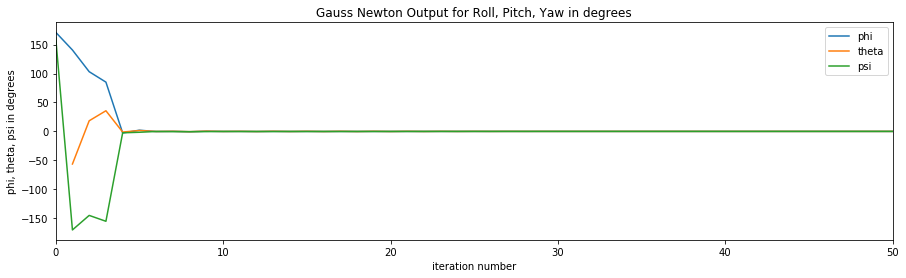

In [168]:
outgraph3 = GN_Q_0.plot(x=GN_Q_0.index,y=['phi','theta','psi'],
                        title="Gauss Newton Output for Roll, Pitch, Yaw in degrees",
                        figsize=(15.0,4.0),legend=True)
outgraph3.set_xlabel("iteration number")
outgraph3.set_ylabel("phi, theta, psi in degrees")


In [45]:
## X 50degrees 

 Timestamp        Ax        Ay        Az        Gx        Gy  \
1125  1494779731809  0.344765 -0.134075  9.710882 -0.001065  0.004261   
1126  1494779731830  0.344765 -0.134075  9.634268 -0.001065  0.003196   
1127  1494779731853  0.344765 -0.134075  9.634268 -0.006392  0.001065   
1128  1494779731874  0.344765 -0.134075  9.634268 -0.006392  0.001065   
1129  1494779731895  0.363919 -0.114922  9.595961 -0.002131  0.004261   

            Gz   MFx   MFy   MFz  
1125  0.001065 -9.00  6.75 -29.5  
1126  0.002131 -8.25  6.75 -29.5  
1127  0.002131 -8.25  6.75 -29.5  
1128  0.002131 -8.25  6.75 -29.5  
1129 -0.001065 -9.00  6.25 -30.0  
Timestamp    1.494780e+12
Ax           3.498182e-01
Ay          -1.278746e-01
Az           9.645478e+00
Gx          -1.081219e-03
Gy           3.489109e-03
Gz           2.149552e-03
MFx         -8.154090e+00
MFy          6.280098e+00
MFz         -3.016979e+01
dtype: float64
    

## at 0 degrees

          Timestamp        Ax        Ay        Az        Gx        Gy  \
1125  1494275017864  0.402226 -0.210690  9.595961 -0.004261  0.002131   
1126  1494275017886  0.383072 -0.191536  9.672575 -0.004261  0.002131   
1127  1494275017909  0.402226 -0.191536  9.576807  0.002131  0.003196   
1128  1494275017930  0.383072 -0.191536  9.672575 -0.003196  0.001065   
1129  1494275017952  0.421380 -0.191536  9.615114 -0.004261 -0.001065   

            Gz   MFx    MFy    MFz  
1125  0.002131 -2.75  22.25 -39.75  
1126  0.002131 -2.25  21.75 -39.25  
1127  0.001065 -2.25  21.75 -39.25  
1128  0.001065 -1.75  21.75 -39.00  
1129  0.004261 -1.75  21.75 -39.00  
Timestamp    1.494275e+12
Ax           4.030215e-01
Ay          -1.938762e-01
Az           9.632899e+00
Gx          -1.060709e-03
Gy           3.092325e-03
Gz           1.810039e-03
MFx         -2.680208e+00
MFy          2.209064e+01
MFz         -3.946090e+01
dtype: float64
    

88.47488584474885

In [46]:
112*46/219

23.525114155251142